# <h1 align = 'center'>**TEAM ID:**  PTID-CDS-JAN-24-1772
# <h1 align= 'center'>**PROJECT ID:** PRCP-1009-CellphonePrice


## **Business case:**
<p align = 'justify'>Bob has started his own mobile company. He wants to give a tough fight to big companies like Apple, Samsung etc.
He does not know how to estimate the price of mobiles his company creates. In this competitive mobile phone market, you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict the actual price but a price range indicating how high the price is.

#### PROBLEM STATEMENT

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


## **Importing basic libraries:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Importing the dataset:**

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/content/datasets_11167_15520_train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## **Domain analysis:**

-  This dataset provides the price range of cell phones based on their respective specifications.
- The target variable is the 'price_range' and the the factors affecting the price_range are taken as the independent features such as follows:
<ol>
<li>battery_power- Total energy a battery can store in one time measured in mAh(milliampere-hour)i.e., it shows how long a device will run before the battery charge is run out.</li>
<li>blue- whether the device has the bluetooth or not</li>
<li>clock_speed- speed at which the microprocessor executes instructions</li>
<li>dual_sim- has dual sim or not</li>
<li>fc- front camera (Megapixels)</li>
<li>four_g- has 4G or not</li>
<li>int_memory- Internal memory in(gigabytes)</li>
<li>m_dep- mobile depth in(Cm):
<ol type= 'i'>
<li>"mobile depth" typically refers to the thickness or the measurement of the phone from the front face to the back face.</li>
<li>It represents how slim or thick the phone is. A thinner phone is generally considered more sleek and modern, while a thicker phone might accommodate larger batteries, additional features, or structural elements.</li>
<li>mobile phones typically have depths ranging from around 7 mm to 10 mm, with some flagship models even thinner, measuring below 7 mm, depends on individual preferences and priorities, such as design, functionality, and ergonomics.</li></ol>
<li>mobile_wt- Weight of mobile phone:
<ol type='i'>
<li>The weight of mobile phones can vary based on factors such as the device's size, materials, components, and features. Generally, modern smartphones are designed to be lightweight and portable, but their weights can still vary significantly.</li>
<li>Here's a rough breakdown of mobile phone weights:</li>
<dd>-Entry-level and budget smartphones: 100-150 grams</dd>
<dd>-Mid-range smartphones: 150-200 grams</dd>
<dd>-Flagship and premium smartphones: 150-250 grams</dd></ol>
<li>n_cores- Number of cores of processor
<li>pc- primary camera (Megapixels):
<ol type= 'i'>
<li>The primary camera in a cellphone, often referred to simply as the "main camera," is the primary imaging system on the device. It's the rear-facing camera that's typically used for taking photos and videos.</li>
<li>Any modern smartphones offer primary camera resolutions ranging from around 12 megapixels to as high as 108 megapixels.</li>
<li>However, the number of megapixels alone does not determine the overall image quality. Factors such as sensor size, pixel size, lens quality, image processing algorithms, and optical stabilization also play crucial roles in determining the quality of photos and videos captured by a smartphone camera.</li></ol>
<li>px_height- Pixel resolution height
<li>px-weight- pixel resolution width
<li>ram- Random access memory in(Megabytes)
<li>sc_h- Screen height of mobile in Cm:
<ol type= 'i'>
<li>Screen heights are typically measured diagonally, from one corner of the screen to the opposite corner. The most common screen sizes for smartphones typically fall between 5 inches and 6.5 inches diagonally.</li>
<li>In terms of general specifications in centimeters, a screen size of around 12 to 17 centimeters (approximately 4.7 to 6.7 inches) diagonally is common for modern smartphones. However, this can vary depending on the aspect ratio and design of the phone's display.</li></ol>
<li>sc_w- Screen width  mobile in cm:
<ol type= 'i'>
<li> the most common screen widths for smartphones typically fall between 5 centimeters (approximately 2 inches) and 10 centimeters (approximately 4 inches).</li></ol>
<li>talk_time- Longest time that a single battery charge will last when you are constantly talking on the phone
<li>three_g- has 3G or not
<li>touch_screen- has touch screen or not
<li>wifi- has wifi or not
- The target variable 'price_range' has the following categories:
<ul>
<li>0- Low cost
<li>1- Medium cost
<li>2- High cost
<li>3- Very High cost


## Basic checks:

In [ ]:
# viewing dimension of the data

x= data.shape
print(x)
print(f'rows: {x[0]}\ncolumns: {x[1]}')

(2000, 21)
rows: 2000
columns: 21


In [ ]:
# first five rows

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# last five records

data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# column names

data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# showing datatypes

data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### Insights:
- All the columns shows the numerical datatypes of int and float.
- clock_speed and m_dep shows float64 datatype.
- The rest of the features have int64 datatype.

In [ ]:
# Basic information about the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# Insights:
# There are no null values and all the features are of numerical datatypes.

In [ ]:
# Statistical information

data.describe().T.sort_values('std', ascending = False)\
.style.background_gradient(cmap='flare')



,count,mean,std,min,25%,50%,75%,max
ram,2000.000000,2124.213000,1084.732044,256.000000,1207.500000,2146.500000,3064.500000,3998.000000
px_height,2000.000000,645.108000,443.780811,0.000000,282.750000,564.000000,947.250000,1960.000000
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
px_width,2000.000000,1251.515500,432.199447,500.000000,874.750000,1247.000000,1633.000000,1998.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
pc,2000.000000,9.916500,6.064315,0.000000,5.000000,10.000000,15.000000,20.000000
talk_time,2000.000000,11.011000,5.463955,2.000000,6.000000,11.000000,16.000000,20.000000
sc_w,2000.000000,5.767000,4.356398,0.000000,2.000000,5.000000,9.000000,18.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000


#### Insights:
- Each feature has 2000 records with no null values.
- The average of **RAM** is around 2124 megabytes ranging from minimum of 256MB to maximum of 4000MB.
- The **px_height** has mean value of 645 with a minimum value of 0 and maximum of 1960. The **minimum pixel height** for cell phones can vary depending on factors such as the device's screen size, resolution, and aspect ratio. However in modern smartphones, the minimum pixel height for a usable display is typically around 480 pixels or higher for smaller screens. Hence this minimum value needs to be corrected.
- The averge value of the **battery power** is around 1240mAh ranging from a minimum of 500mAh and maximum of 2000mAh.
- The average **px_width** is around 1250 with a minimum of 500 to a maximum of 2000.
- The average **mobile_wt** is around 140g with a minimum of 80g and a maximum of 200g.
- The mean **int_memory** is around 32GB. The minimum value is around 2GB and a maximum of 64GB.
- The rest of the features have discrete values. But there are certain features that show minimum values, which do not seem to be rational. They are:
<dl>
<dt>m_dep(mobile depth in cm)
<dd>- shows minimum value as 0.1cm (1mm) whereas most of the smartphones have a minimum thickness ranging from around 6mm to 10mm.
<dt>px_height (pixel resolution height)
<dd>-The minimum value is 0 here, but in modern smartphones, the minimum pixel height for a usable display is typically around 480 pixels or higher for smaller screens
<dt>sc_w(screen width in cm)
<dd>- the data shows 0cm as the minimum value whereas smartphones typically have screen widths ranging from around 2 inches (5.08cm) to 6 inches or more.



In [ ]:
# no of unique elements in each of the columns

data.nunique().to_frame().T

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1094,2,26,2,20,2,63,10,121,8,21,1137,1109,1562,15,19,19,2,2,2,4


#### Insights:
Based on the count of unique values in all the features, it is clear as such follows:
<dl>
<dt>Continuous features
<dd>- battery_power, clock_speed, int_memory, mobile_wt, px_height, px_width, ram.
<dt>discrete features
<dd>- blue, dual_sim, fc, four_g, m_dep, n_cores, pc, sc_h, sc_w, talk_time, three_g, touch_screen, wifi.

## Exploratory data analysis:

### UNIVARIATE ANALYSIS:


#### Distribution of Categorical/ discrete and numerical features:

In [4]:
target= 'price_range'
independent_features= [column for column in data.drop(target, axis=1)]

# let's take a threshold of less than 25 unique values for a feature to be
# considered as a categorical feature
categorical_features= [column for column in independent_features if data[column].nunique() < 25]
continuous_features= [column for column in independent_features if data[column].nunique() >=25]

print(f'Target variable: {target}\nTotal no of independent features (except target): {len(independent_features)}')
print(f'No of categorical features (<25 distinct values): {len(categorical_features)}')
print(f'No of continuous features: {len(continuous_features)}')

Target variable: price_range
Total no of independent features (except target): 20
No of categorical features (<25 distinct values): 13
No of continuous features: 7


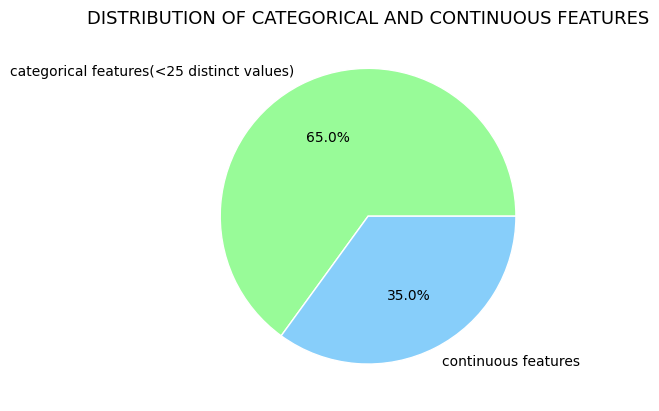

In [ ]:
# pie chart showing the distribution
plt.pie([len(categorical_features), len(continuous_features)],
        labels= ['categorical features(<25 distinct values)', 'continuous features'],
        colors= ['palegreen','lightskyblue'],
        textprops= {'fontsize': 10},
        wedgeprops= {'edgecolor': 'white'},
        autopct= '%.1f%%')

plt.title('DISTRIBUTION OF CATEGORICAL AND CONTINUOUS FEATURES', fontsize= 13)
plt.show()

#### Target variable:

In [ ]:
value_counts= data['price_range'].value_counts()
value_counts
# 0- Low cost
# 1- Medium cost
# 2- High cost
# 3- Very High cost

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

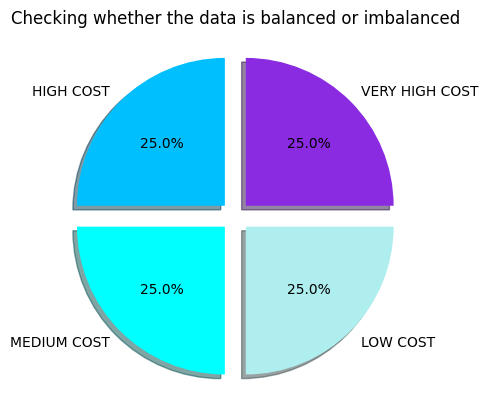

In [ ]:
# defining labels and colors

labels= [f'{"VERY HIGH COST" if i==0 else "HIGH COST" if i ==1 else "MEDIUM COST" if i ==2 else "LOW COST"}'
         for i in range(len(value_counts))]

colors= ['blueviolet', 'deepskyblue', 'aqua', 'paleturquoise']

# creating piechart by plotting the percentage values of unique values

fig, ax= plt.subplots()
ax.pie(value_counts.values,
       labels= labels,
       colors= colors,
       autopct= '%.1f%%',
       explode= [0.1, 0.1, 0.1, 0.1],
       shadow= True)


plt.title('Checking whether the data is balanced or imbalanced')
plt.show()

##### Insights:
- The above piechart shows that the target variable has the equal count in all the classes. Hence the data is completely balanced.

#### Analysis of Categorical features:

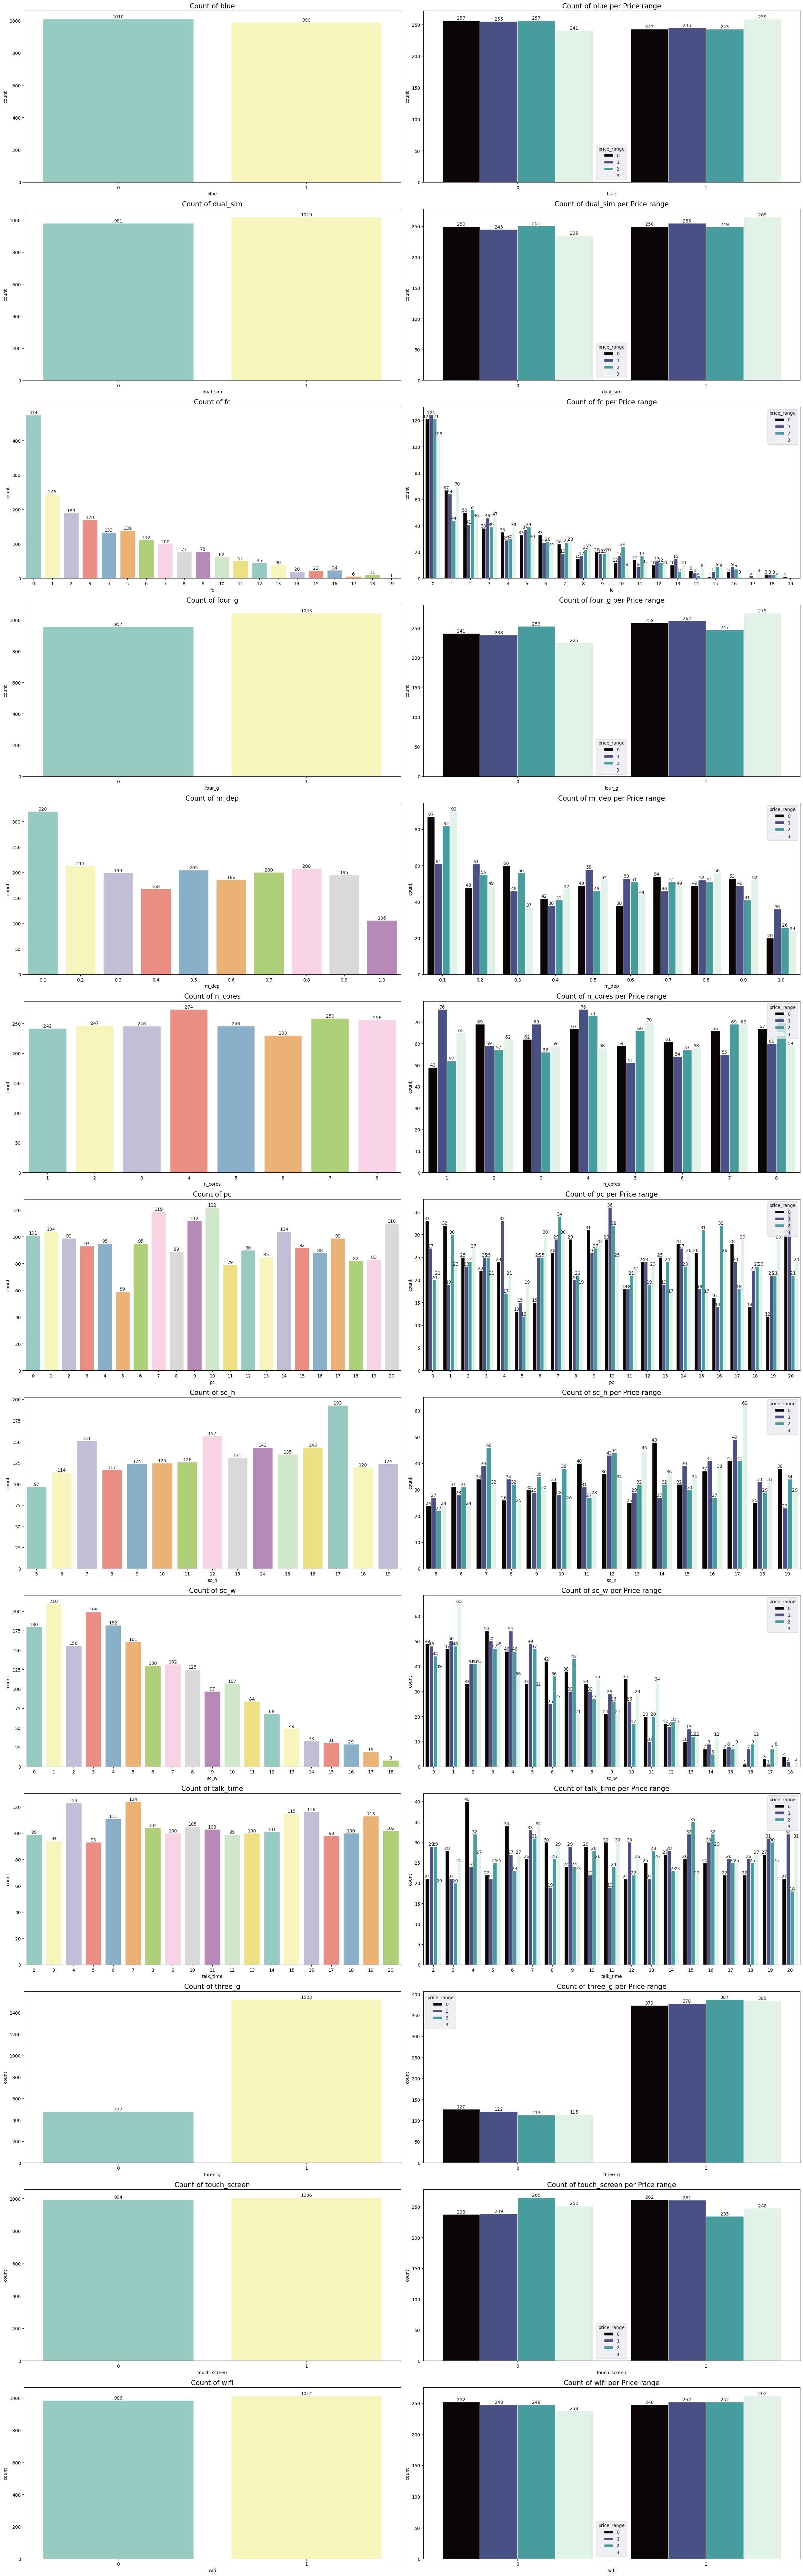

In [ ]:
fig, axes = plt.subplots(13,2, figsize=(25,80))
sns.set_style('darkgrid')
plotnumber = 0

for column in categorical_features:
  if plotnumber<14:
    sns.countplot(data=data, x=column, palette='Set3', ax=axes[plotnumber][0])\
    .set_title(f'Count of {column}', fontsize='15')  #accessing first column of the current subplot

    for container in axes[plotnumber][0].containers:
        axes[plotnumber][0].bar_label(container)

    sns.countplot(data=data, x=column, palette='mako', orient='v',  hue='price_range',ax=axes[plotnumber][1])\
    .set_title(f'Count of {column} per Price range', fontsize='15') #accessing the second column of the current subplot

    for container in axes[plotnumber][1].containers:
        axes[plotnumber][1].bar_label(container)
    plotnumber +=1
plt.tight_layout()
plt.show()

##### Insights:
**Bluetooth**
- The cell phones without bluetooth have slightly the higher frequency than the ones with bluetooth.
- The **count of blue per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones without bluetooth, </li>
<dd>the low-cost and high-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with bluetooth,</li>
<dd>the very high cost phones constitute the majority.</dd></ul>

**Dual Sim**
- Cell phones with Dual Sim have the highest frequency.
-The **count of dual_sim per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones without dual sim, </li>
<dd>the low-cost and high-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with dual sim,</li>
<dd>the very high cost phones constitute the majority.</dd></ul>

**front camera**
- Cell phones with front camera of 0 megapixels have the highest frequency. It shows the majority of cellphones has either no front camera or very lowest resolution with inability to capture any meaningful detail.
-The **count of fc per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 0 megapixels, </li>
<dd>-the medium-cost phones have the highest frequency.</dd>
<dd>-the very high_cost phones have the lowest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with the next highest category of megapixels,</li>
<dd>-the very high cost phones constitute the majority.</dd>
<li>However the frequency of very high cost cell phones do not show any stable consistent decrease or increase in frequency with respect to the front camera's megapixels's trend in the chart. It varies randomly irrespective of the megapixels.</li></ul>  

**4G**
- Cell phones with 4G shows the highest frequency.
-The **count of 4G per price range** shows that,
<ul type= 'disc'>
<li>In cellphones with 4G category, </li>
<dd>the low-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones without 4G,</li>
<dd>the medium cost phones constitute the majority.</dd></ul>

**mobile depth(m_dep in cm)**
- Cell phones with mobile depth of 0.1cm (1mm)shows the highest frequency but generally smartphones have depth of around 6mm to 10mm (0.6cm to 1cm). Hence clearly, the data is corrupted here.
- Mobile depth of 1cm constitutes the lowest category.
-The **count of fc per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 0.1cm of mobile depth, </li>
<dd>-the very high-cost phones and the low-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>In the lowest category of m_dep of 1cm,</li>
<dd>-the medium-cost phones constitute the majority.</dd>
</ul>

**Number of cores of processor (n_cores)**
- Cell phones with 4 cores have the highest frequency.
- mobile phones having 6 cores constitute the lowest category.  However there is no much difference between these two categories.
-The **count of n_cores per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 4 cores, </li>
<dd>-the medium-cost phones have the highest frequency.</dd>
<dd>-the very high-cost phones constitute the lowest frequency.</dd>
</ul>

**Primary camera (pc) in megapixels**
- Mobile phones with primary camera of 10 megapixels have the highest frequency followed by 7 megapixels as the next highest frequency.
- Mobile phones with 5 megapixels occupies the lowest category.
-The **count of pc per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 10 megapixels, </li>
<dd>-the medium-cost phones have the highest frequency.</dd>
<dd>-the very high_cost phones have the lowest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with the next highest category of 7 megapixels,</li>
<dd>-the high cost phones constitute the majority.</dd>
</ul>  

**screen height (in cm)**
- Cell phones with 17cm have the highest frequency followed by 12cm.
- 5 centimeters constitute the lowest frequency.
-The **count of sc_h per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 17cm, </li>
<dd>-the very high-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with the lowest category of 5cm,</li>
<dd>-the medium cost phones constitute the majority.</dd>
</ul>  

**screen width (in cm)**
- Cell phones with 1cm have the highest frequency followed by 3cm.
- 18 centimeters constitute the lowest frequency.
-The **count of sc_w per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 1cm, </li>
<dd>-the very high-cost phones have the highest frequency followed by medium cost phones.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with the lowest category of 18cm,</li>
<dd>- the low cost phones constitute the majority.</dd>
</ul>

**talk_time**
- Cell phones with talk time of 7 have the highest frequency followed by 4.
-The **count of talk_time per price range** shows that,
<ul type= 'disc'>
<li>Among cellphones with the highest category of 7, </li>
<dd>-the very high_cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones with the next highest category of 4,</li>
<dd>-the low cost phones constitute the majority.</dd>
</ul>

**3G**
- Cell phones with 3G shows the highest frequency.
-The **count of 3G per price range** shows that,
<ul type= 'disc'>
<li>In cellphones with 3G category, </li>
<dd>the high-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones without 3G,</li>
<dd>the low cost phones constitute the majority.</dd></ul>

**touch_screen**
- Cell phones with touch screen shows the highest frequency.
-The **count of touch screen per price range** shows that,
<ul type= 'disc'>
<li>In cellphones with touch screen category, </li>
<dd>the low-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones without touch screen,</li>
<dd>the high cost phones constitute the majority.</dd></ul>

**wifi**
- Cell phones with wifi shows the highest frequency.
-The **count of wifi per price range** shows that,
<ul type= 'disc'>
<li>In cellphones with wifi category, </li>
<dd>the very high-cost phones have the highest frequency.</dd>
</ul>
<ul type='disc'>
<li>Among the cell phones without wifi,</li>
<dd>the low cost phones constitute the majority.</dd></ul>


#### Analysis of numerical (continuous)features:


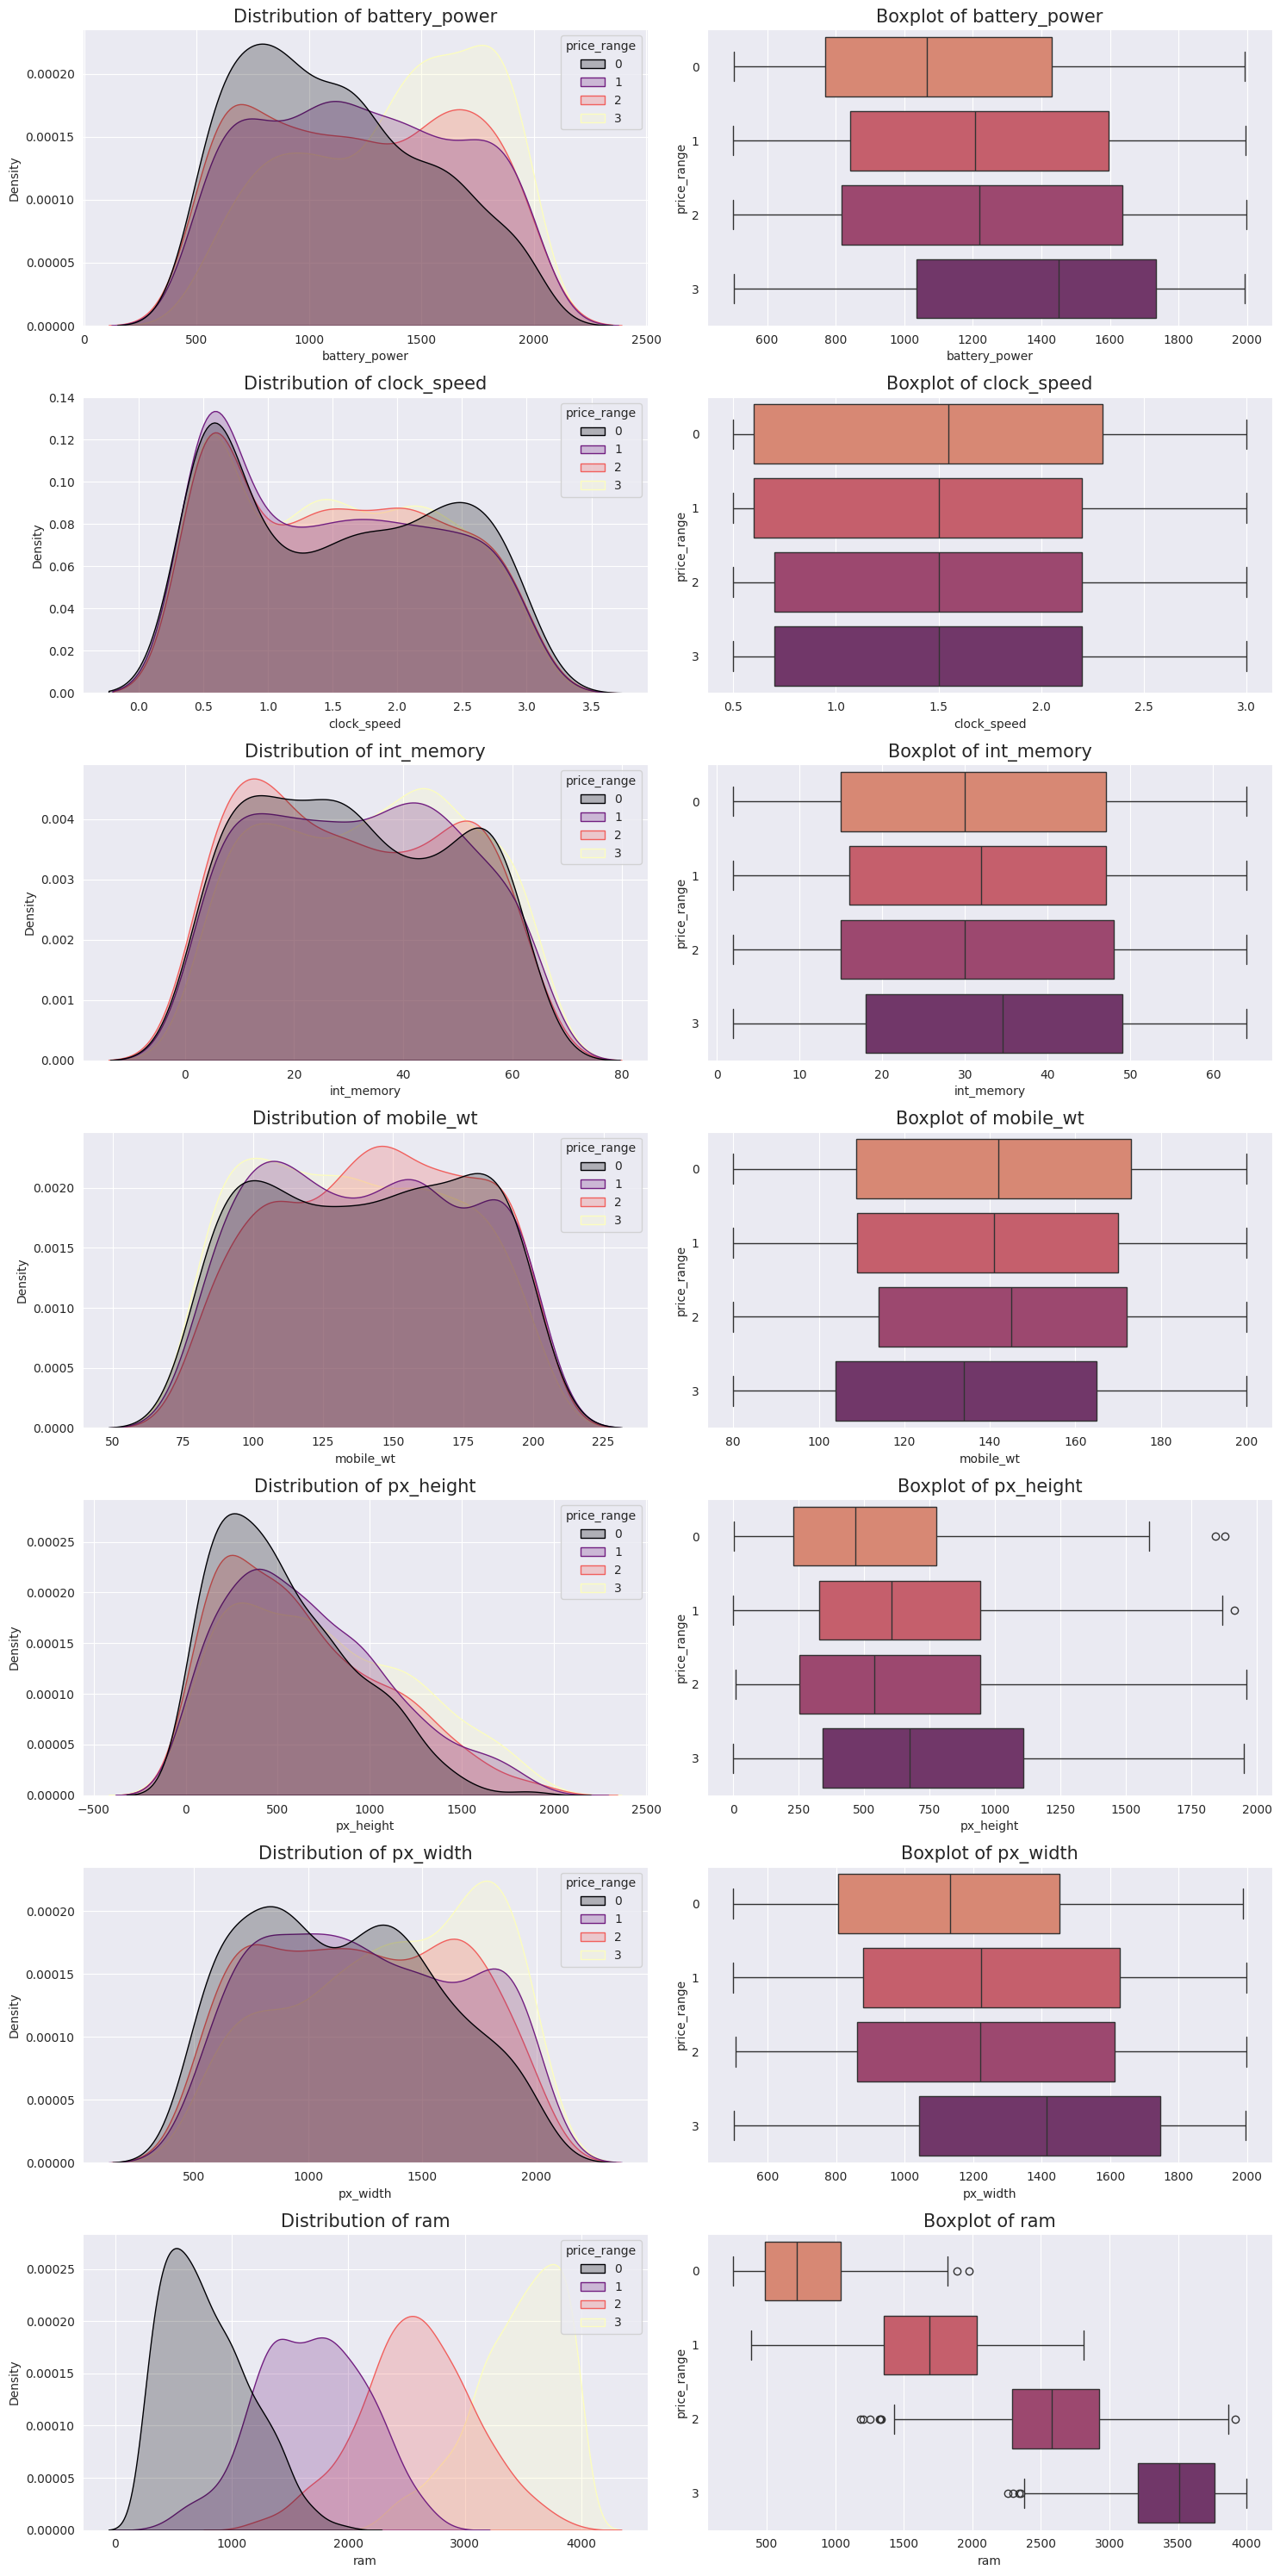

In [ ]:
# Distribution plots and boxplots are plotted to show the data distribution and
# the range of majority of distribution across all the four categories of the price range.
fig, axes= plt.subplots(7, 2, figsize= (15, 30))
sns.set_style('darkgrid')

plotnum= 0
for column in continuous_features:
  if plotnum <8:
    sns.kdeplot(data=data, x= column, hue= 'price_range',
                palette= 'magma', fill= True, ax= axes[plotnum][0])\
                 .set_title(f'Distribution of {column}', fontsize= '15')
    sns.boxplot(data= data, x= column, y= 'price_range', orient='h',
                palette= 'flare', ax= axes[plotnum][1])\
                .set_title(f'Boxplot of {column}', fontsize= '15')
    plotnum +=1
plt.tight_layout()
plt.show()


##### Insights:
- A **normal distribution** (with no skewness) is observed in the features of int_memory and mobile_wt for all price ranges.

- **Battery Power**:
<ul type= 'square'>
<li>Cell phones with the price ranges of 0, 1, 2, 3 have battery_power at the range of 600-800, 700-1350, 600-900 and 1500-1900mAh respectively.</li></ul>

- **Clock Speed**:
<ul type='square'>
<li>Cell phones with all price ranges have clock_speed at the range of 0.4-0.8.</li>
<li>A positive skewness is observed in the distribution for all price ranges.</li>
<li>The boxplot of clock_speed shows that all the price ranges have the same median equal to 1.5</li></ul>

- **Internal memory**:
<ul type= 'square'>
<li>Cell phones with the price ranges of 0, 1, 2, 3 have mostly internal memory in the range of 10-30, 35-50, 13-20, and 40-50 gigabytes respectively.</li></ul>

- **mobile weight**:
<ul type= 'square'>
<li>Mobile weight distribution curve shows roughly normal distribution.</li>
<li>The price ranges of 0, 1, 2, 3 have mobile weights mostlly around 150-180grams, 90-115grams, 130-170grams, 90-120 grams. </li></ul>

- **pixel resolution height**:
<ul type='square'>
<li>A positive skewness is visible in the distribution of px_height for all the price ranges.</li>
<li>All the price ranges mostly have pixelheight in the range of 65-500 pixels.</li></ul>

- **Pixel resolution width**:
<ul type='square'>
<li>The price ranges of 0-3 mostly have their pixel width in the range of 750-900, 700-1350, 750-1200 and 1500-1700 respectively.</li></ul>

- **RAM**:
<ul type='square'>
<li>cell phones with price ranges of 0-3 mostly have ram in the range of 450-750, 1350-1900, 2500-2800 and 3500-3950 respectively.</li>
<li>It is clear fromt the chart that the price increases as the ram increases.</li></ul>


In [ ]:
pr = data.groupby(['price_range'])
target= pr.describe(percentiles=[0.25,0.5,0.75])[continuous_features]
target.style.background_gradient(cmap='Blues')

##### Insights:
- The highest mean value of battery power, int_memory, px_height, px_width, ram belong to the **very high cost** cell phones.

### BIVARIATE ANALYSIS:

In [ ]:
data.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


#### Relationship between numerical continuous features and the target variable


In [ ]:
continuous_features

['battery_power',
 'clock_speed',
 'int_memory',
 'mobile_wt',
 'px_height',
 'px_width',
 'ram']

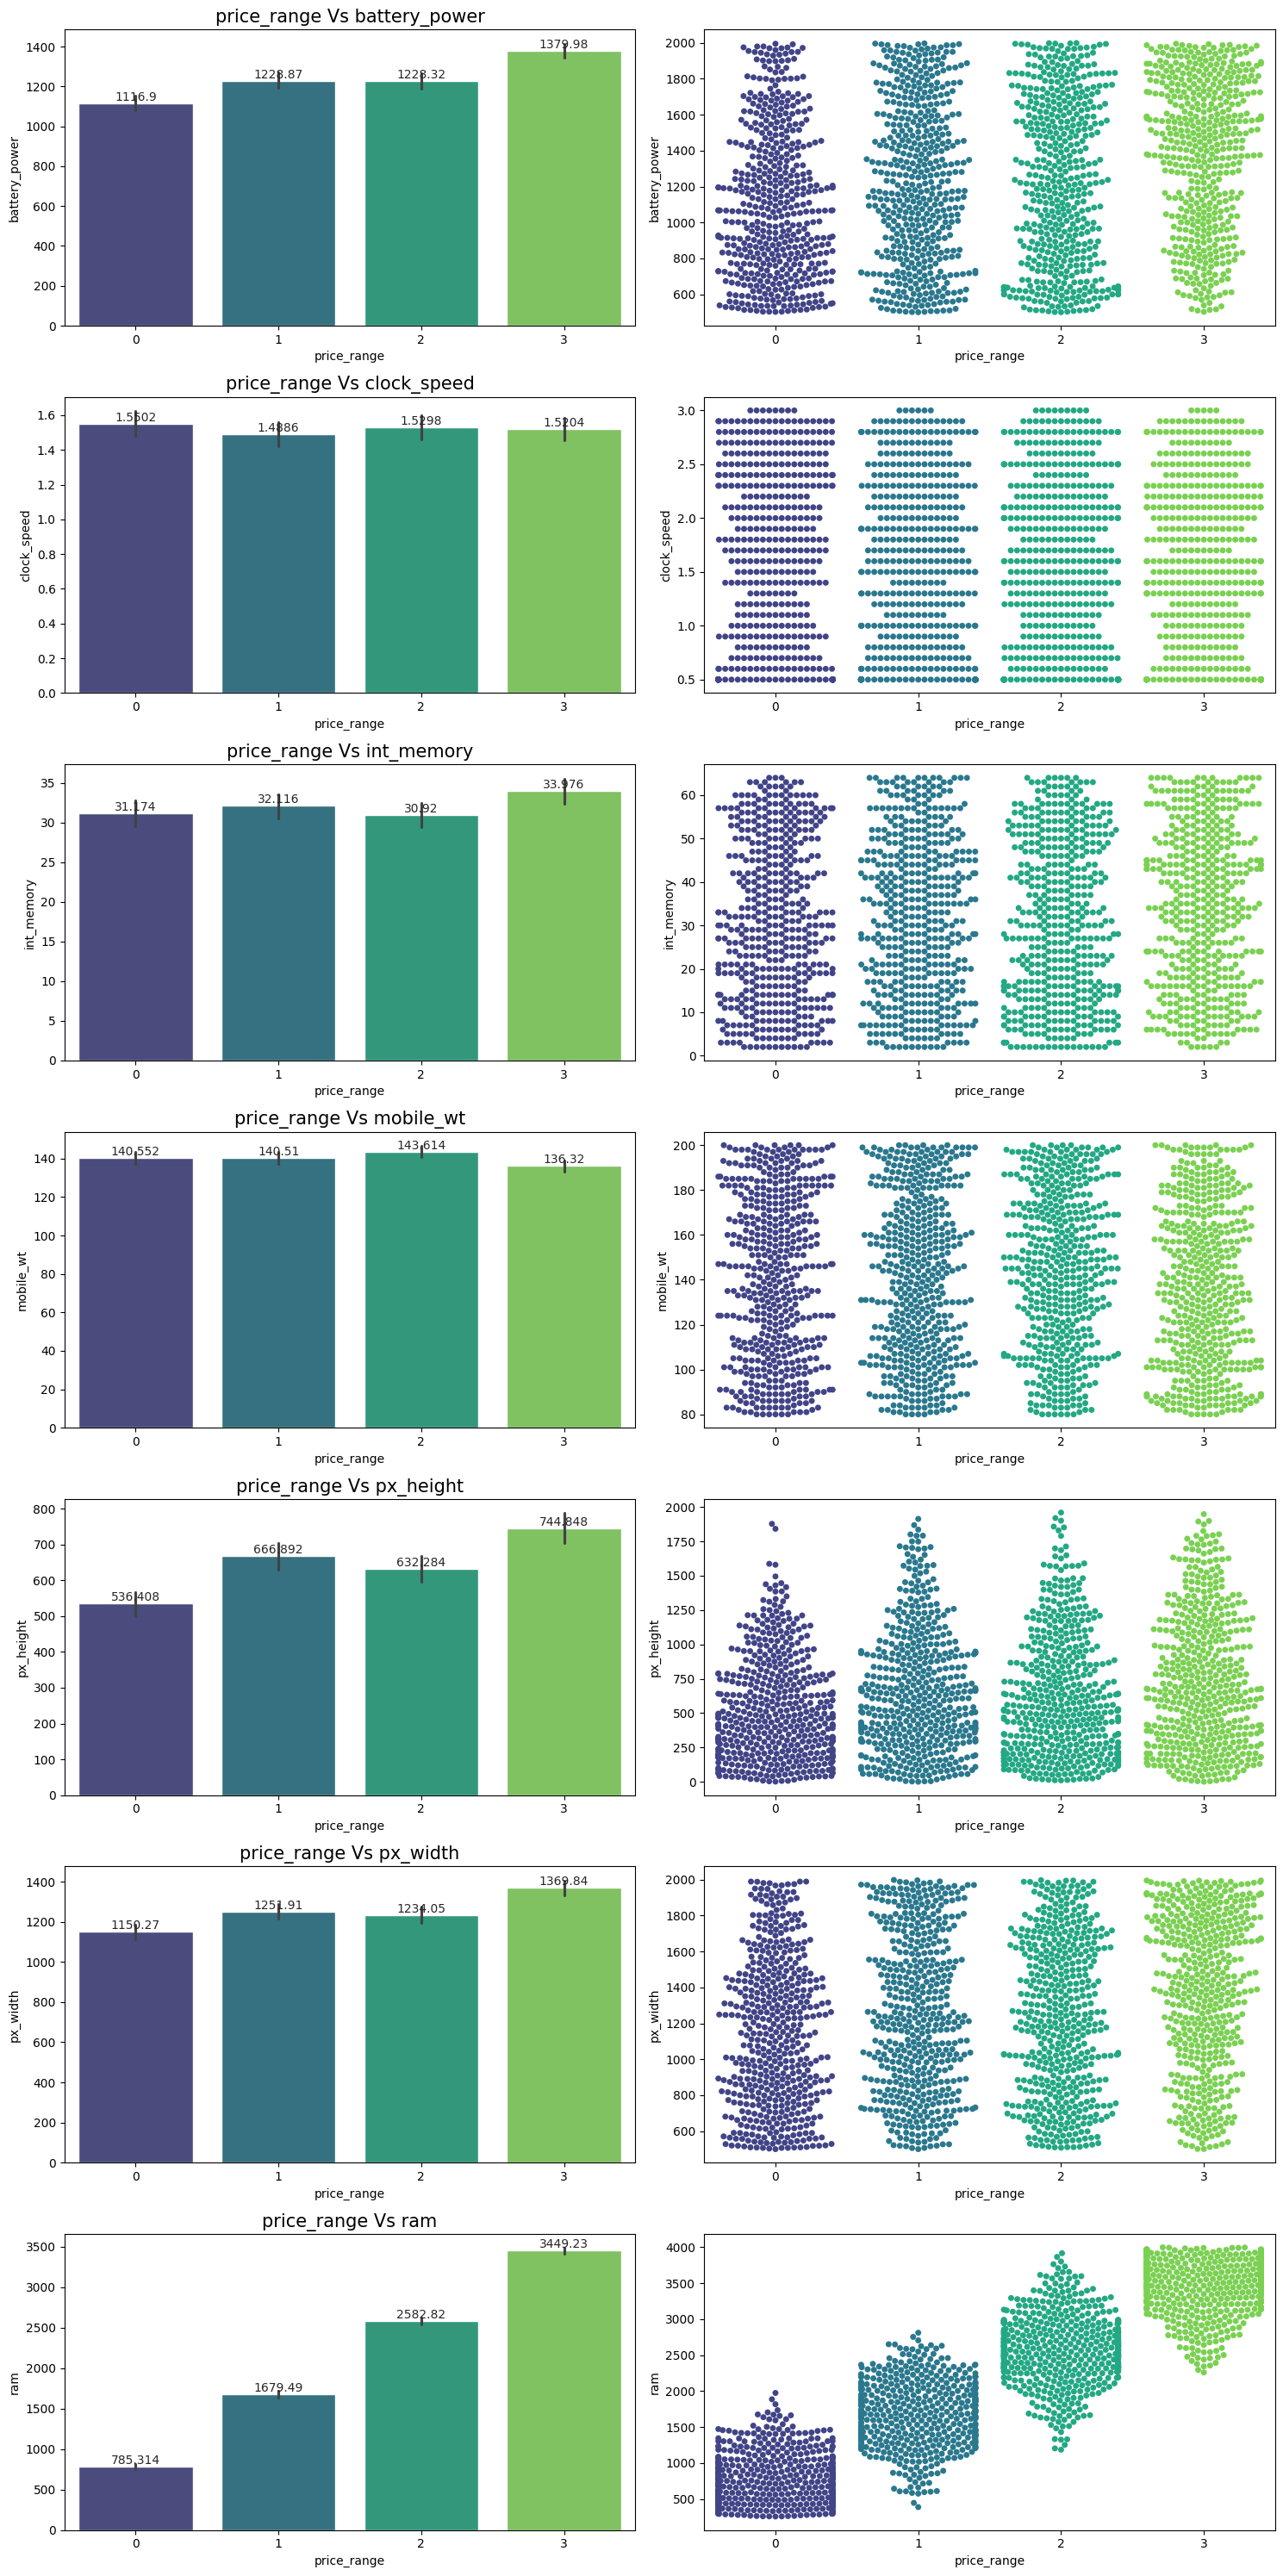

In [5]:
# Bar plots and swarm plots are plotted to visualize the relationship between the
# continuous input features and the target variable

fig, axes= plt.subplots(7,2, figsize= (15, 30))
sns.set_style('darkgrid')
idx=0

for column in continuous_features:
  if idx <8:
       sns.barplot(data=data, x='price_range', y= column, palette='viridis', ax= axes[idx][0])\
       .set_title(f'price_range Vs {column}', fontsize= '15')

       for container in axes[idx][0].containers:
           axes[idx][0].bar_label(container)

       sns.swarmplot(data=data, x= 'price_range', y= column, palette='viridis', ax= axes[idx][1])

  idx+=1
plt.tight_layout()
plt.show()
